# <center>Yulu Business Case Study</center>       

## Introduction

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

### Problem Statement

Yulu, a leading micro-mobility service provider in India, is experiencing a decline in revenue and seeks to understand the factors affecting the demand for its shared electric cycles. The objective is to identify significant variables that influence demand and determine how well these variables explain the market trends. By analyzing these factors, Yulu aims to optimize its operations and boost demand for its shared electric cycles across different locations in the Indian market.

In [1]:
#Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind,f_oneway, levene, kruskal, shapiro, chi2_contingency
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings('ignore')

### 1. Exploratory Data Analysis <br>
The analysis was conducted on the data located at - https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

In [2]:
#Load the dataset
df = pd.read_csv("bike_sharing.csv")

In [3]:
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
print(f'No of rows/Datapoints: {df.shape[0]} \nNo of Columns/Features: {df.shape[1]}')

No of rows/Datapoints: 10886 
No of Columns/Features: 12


In [5]:
# Checking the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- **Datatype of following features/attributes needs to change from int,float to an object(categorical) type. This helps the machine learning model understand that the values are not numeric but represent categories.** <br>
1) **datetime** - to datetime data type<br>
2) **season** - to categorical(object)<br>
3) **holiday** - to categorical(object)<br>
4) **workingday** - to categorical(object)<br>
5) **weather** - to categorical(object)<br>

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [7]:
cat_cols = ['season','holiday','workingday','weather']
for i in cat_cols:
    df[i] = df[i].astype('object')

In [8]:
#rechecking the datatypes of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [9]:
df.describe(include='all')  #inculde='all' displays both numerical and categorical variables details

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


**Overview of data**
- The dataset spans from **2011-01-01 00:00:00 to 2012-12-19 23:00:00,** covering nearly two full years of data.
- Numerical features such as temperature, humidity, windspeed, and counts of casual and registered bike rentals show diverse ranges and distributions, highlighting the variability in rental patterns across different conditions.

In [10]:
df.isnull().sum() #checking number of missing values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

- **The data does not contain any null values, hence no need of handling the missing data.**

In [11]:
#To check duplicate values
df.duplicated().sum()

0

- There are no **duplicate entries.**

### 1.1 Analyzing the distribution of Numerical & Categorical variables.

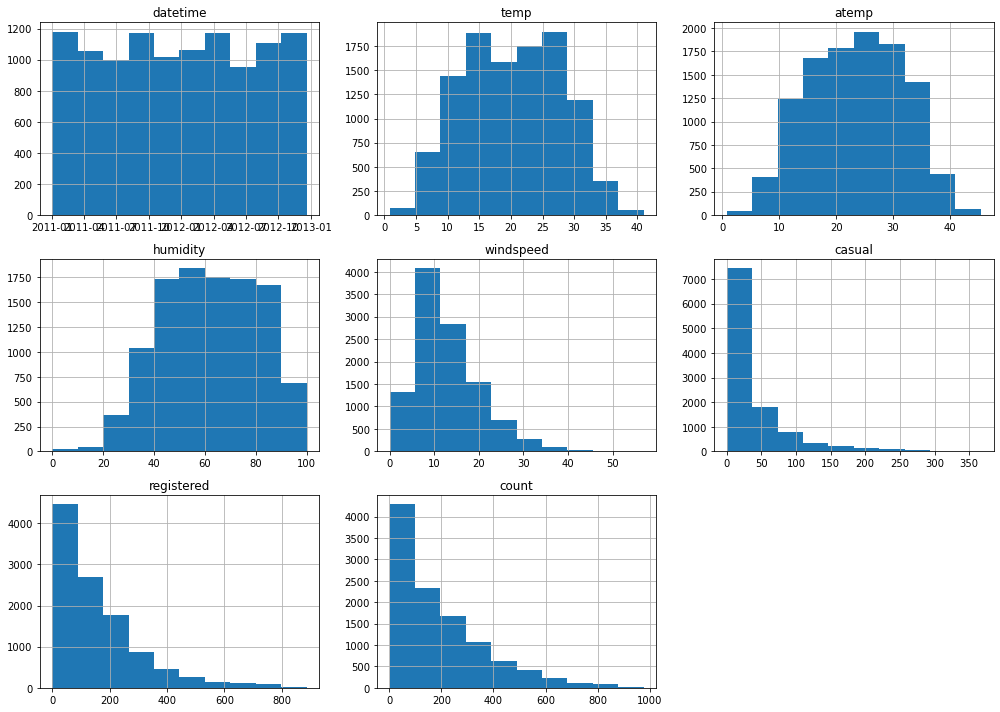

In [12]:
# Plot distribution of numeric variables
df.hist(figsize=(14, 10))
plt.tight_layout()
plt.show()

### **Analysis of numerical variables**

**Temp**
- The 'temp' column exhibits a wide temperature range from 0.82 to 41.0 degrees Celsius, with a median of 20.5 and moderate variability around a mean of approximately 20.23 degrees.

**atemp**
- The 'atemp' column reveals a significant range of apparent temperatures, from 0.76 to 45.455 degrees, with an average of approximately 23.66 and moderate variability surrounding the median of 24.24.

**Humidity**
- The 'humidity' column illustrates a range of humidity values from 0 to 100, with an average of approximately 61.89. The distribution exhibits moderate variability, with the 25th percentile at 47 and the 75th percentile at 77, indicating a variety of humidity levels in the dataset.

**WindSpeed**
- The 'windspeed' column shows a range of wind speeds between 0 and 56.9979, with an average of approximately 12.80.

**Casual**
- The 'casual' column exhibits a wide range of bike rental counts, with values ranging from 0 to 367. The distribution is positively skewed, evidenced by the mean (36.02) being greater than the median (17.0).

**Registered**
- The 'registered' column exhibits a varied range of registered bike rental counts, from 0 to 886. The distribution is positively skewed, as indicated by the mean (155.55) being greater than the median (118.0).

**Count**
- The 'count' column indicates a wide range of total bike rental counts, from 1 to 977. The distribution is positively skewed, with a mean (191.57) that is higher than the median (145.0), reflecting a concentration of lower values.

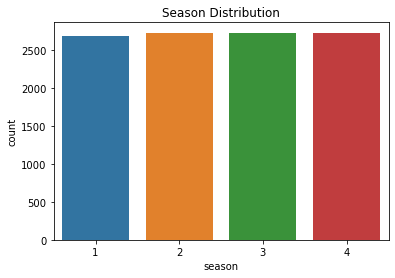

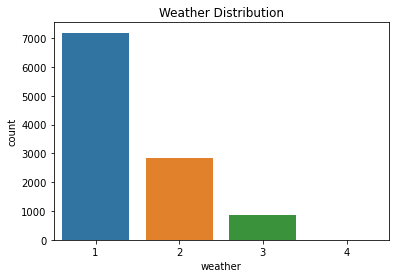

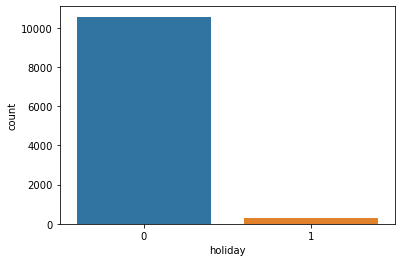

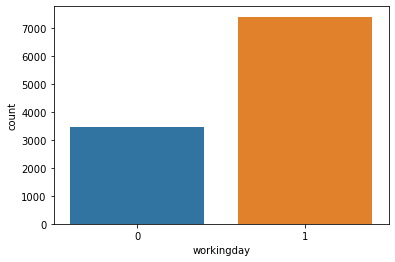

In [13]:
# Plot count of categorical variables (season, weather, etc.)
sns.countplot(x='season', data=df)
plt.title('Season Distribution')
plt.show()

sns.countplot(x='weather', data=df)
plt.title('Weather Distribution')
plt.show()

sns.countplot(x='holiday',data=df)
plt.show('Holiday Distribution') #holiday -1 and rest - 0
plt.show()

sns.countplot(x='workingday',data=df)
plt.show('workingday Distribution') #working day -1 and weekend - 0
plt.show()

### Conclusion from Distribution Analysis

1) **Numerical Variables:**
- The distribution of temperature shows that demand is likely more stable at moderate temperatures, with extreme                  temperatures reducing rentals.
-  Wind speed and humidity might have a minor effect, but higher values (high windspeed or humidity) could reduce rentals.

2) **Categorical Variables:**
-  Rentals likely peak during the summer and fall seasons, as they are more bike-friendly.
-  Clear weather boosts demand, while foggy or rainy days see lower usage.

### 1.2 Outlier detection

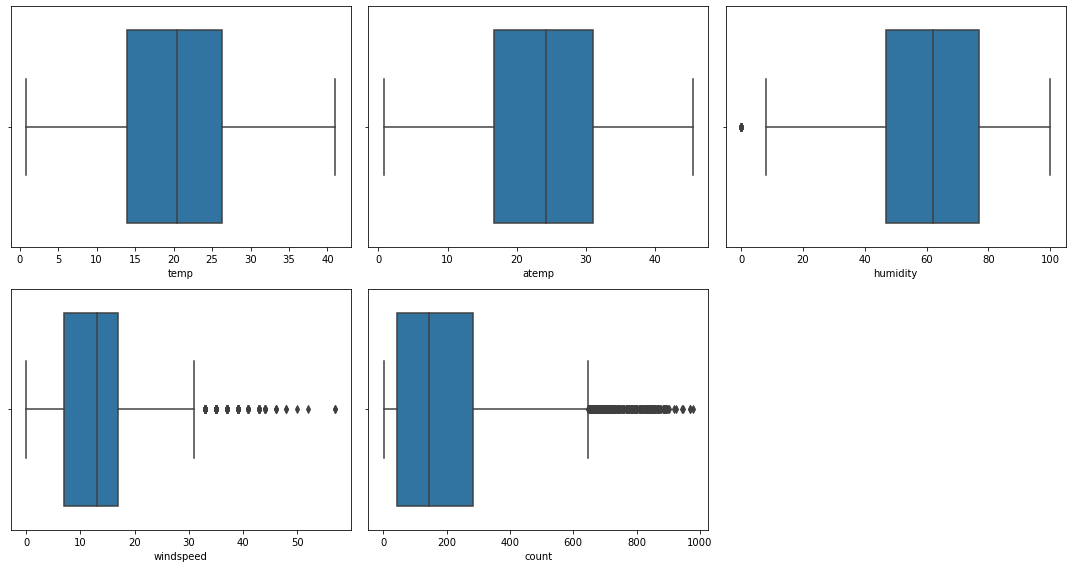

In [14]:

# Set the size of the plots
plt.figure(figsize=(15, 8))

# List of numerical columns to check for outliers
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

# Plot boxplots for each numerical variable
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)  # Create a subplot for each variable
    sns.boxplot(x=col, data=df)
    #plt.title(f'{col}')
    #plt.xlabel(f'{col}')
    
plt.tight_layout()
plt.show()


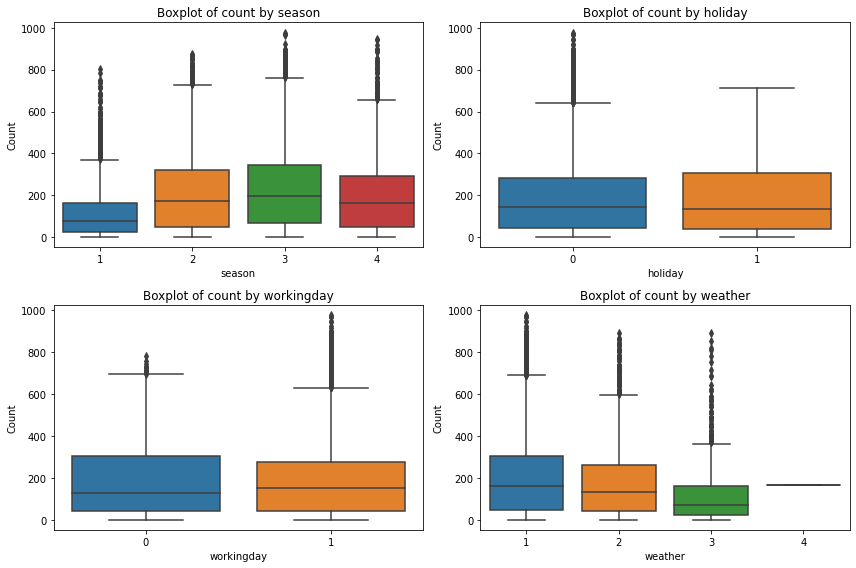

In [15]:
# List of categorical variables
categorical_vars = ['season', 'holiday', 'workingday', 'weather']

# Create a figure for subplots
plt.figure(figsize=(12, 8))

# Loop through each categorical variable
for i, var in enumerate(categorical_vars):
    plt.subplot(2, 2, i+1) 
    sns.boxplot(x=var, y='count', data=df)  # Plot each variable against 'count'
    plt.title(f'Boxplot of count by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


- **Here the outliers represent real-world conditions (weather, demand fluctuations),so I would like to keep them for a more complete and realistic analysis. This will help Yulu understand demand under both normal and extreme conditions.**

### 1.3 Multivariate analysis


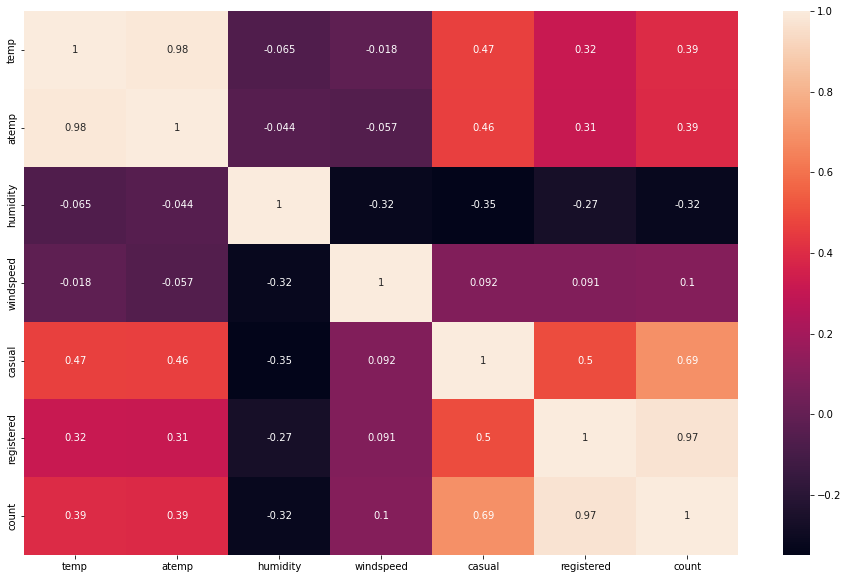

In [16]:
# correlation chart using heatmap
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

### Correlation analysis

#### Atemp:
- Exhibits a strong positive correlation with 'temp' (0.98), indicating a close relationship.
- Shows moderate positive correlations with 'casual' (0.46) and 'registered' (0.31).
- Has a positive correlation with 'count' (0.39), suggesting a link to overall bike rentals.

#### Temp (Temperature):
- Highly correlated with 'atemp' (0.98), reflecting a strong connection.
- Displays moderate positive correlations with 'casual' (0.47) and 'registered' (0.32).
- Shows a positive correlation with 'count' (0.39), indicating a relationship with total bike rentals.

#### Humidity:
- Exhibits weak negative correlations with 'atemp' (-0.04) and 'temp' (-0.06).
- Shows moderate negative correlations with 'casual' (-0.35), 'registered' (-0.27), and 'count' (-0.32), suggesting that higher humidity tends to correlate with fewer bike rentals.

#### Windspeed:
- Displays weak negative correlations with 'atemp' (-0.06) and 'temp' (-0.02).
- Shows weak positive correlations with 'casual' (0.09), 'registered' (0.09), and 'count' (0.10), suggesting a subtle influence on bike rentals as wind speed increases.

#### Casual (Casual Bike Rentals):
- Strong positive correlation with 'atemp' (0.46) and 'temp' (0.47).
- Moderate negative correlation with 'humidity' (-0.35) and a positive correlation with 'windspeed' (0.09).
- Highly correlated with 'registered' (0.50) and 'count' (0.69), indicating a significant impact on overall rentals.

#### Registered (Registered Bike Rentals):
- Positive correlation with 'atemp' (0.31) and 'temp' (0.32).
- Negative correlation with 'humidity' (-0.27) and positive correlation with 'windspeed' (0.09).
- Highly correlated with 'casual' (0.50) and 'count' (0.97), emphasizing a substantial impact on overall rentals.

#### Count (Total Bike Rentals):
- Positive correlation with 'atemp' (0.39), 'temp' (0.39), and 'casual' (0.69).
- Negative correlation with 'humidity' (-0.32).
- Highly correlated with 'registered' (0.97), highlighting the combined effect of casual and registered rentals on the overall count.

## 2. Hypothesis Testing

### 2.1 Bike Demand on Weekdays vs. Weekends

Since we have two independent samples, we can go with two sample independent T-Test.

Assumptions of Two Sample Independent T-Test :

- **The data should be normally distributed** 
- **variances of the two groups should be equal**

Let the Confidence interval be 95%, so siginificance (alpha) is 0.05

**To determine whether a given dataset follows a normal distribution we will perform Shapiro-Wilk test.**

The Test Hypothesis for Shapiro-Wilk test are:
- Null Hypothesis (Ho): The data is normally distributed.
- Alternative Hypothesis (Ha): The data is not normally distributed.

In [17]:
np.random.seed(41)
df_subset = df.sample(100)["count"]
test_stat, p_val = shapiro(df_subset)
p_val

2.634152735936368e-07

As p-value is less than significance value(0.05) we reject Null Hypothesis(Ho).<br>
**Therefore data is not Normally distributed**

#### Q-Q plot Analysis

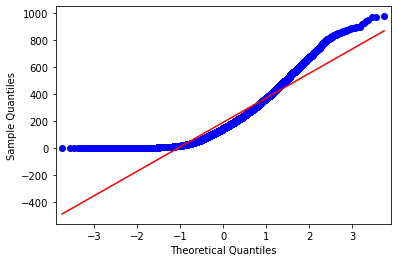

In [18]:
qqplot(df['count'], line = 's')
plt.show()

**Q-Q Plot Interpretations:**
- Normal Distribution: Points closely follow the line with little to no deviation.
- Right-Skewed Distribution: Points will curve upward away from the line.
- Left-Skewed Distribution: Points will curve downward away from the line.
- Heavy Tails: Points form an S-shape, indicating that the tails are more extreme than a normal distribution.

**We will perform Levene's test to check if the variances of two groups are equal**

The Test Hypothesis for Levene's test are:
- Ho: The variances are equal.<br>
- Ha: The variances are not equal.

In [19]:
working_day = df[df['workingday'] == 1]['count']

weekend = df[df['workingday'] == 0]['count']

levene_stat, p_val = levene(working_day, weekend)

p_val

0.9437823280916695

<AxesSubplot:xlabel='count', ylabel='Density'>

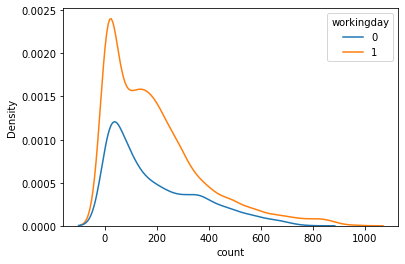

In [20]:
sns.kdeplot(data = df, x = 'count', hue = 'workingday')

As p_value is greater than the significance level,we fail to reject Null hypothesis.

**Therefore, the variances are approximately equal.**

- Despite the data is not normally distributed according to both the Wilkin-ShapiroTest and qq-plot
- It is important to highlight that the variances between the two groups are equal

**So we can proceed with the Two Sample Independent T-Test.**

**Formulating the Hypothesis**
- Ho - There is no significant difference in bike demand between weekdays and weekends.
- Ha - There is a significant difference between working and non-working days.

In [21]:
ttest_stat, p_val = ttest_ind(working_day, weekend)
p_val

0.22644804226361348

As p_value is greater than the significance level,we fail to reject Null hypothesis.

**As T-tests assumption of normality had failed,so we can verify by performing Kruskal-Wallis test as it uses sample medians to compare the groups.**

In [22]:
kruskal_stat, p_val = kruskal(working_day, weekend)

p_val

0.9679113872727798

Again p_value is greater than the significance level,we fail to reject Null hypothesis.

**Therefore, there is no significant difference in bike demand between weekdays and weekends.**

### 2.2 Bike demand in different weather conditions

**Here's why ANOVA is suitable:**
- Bike demand (e.g., number of rides) is a continuous variable.
- Weather conditions (e.g., sunny, rainy, cloudy, etc.) are categorical variables with multiple categories (groups).
- We want to check whether the average bike demand differs across different weather conditions.

So will use ANOVA as we have more than two categories now.

**Assumptions for ANOVA are:**

1. The population data should be normally distributed- The data is not normally distributed as verified above using **Wilkin-Shapiro test and the Q-Q plot.**<br>

2. The data points must be independent- This condition is satisfied.<br>

3. Approximately equal variance within groups- We will verify this using **Levene's test.**

**The Test hypothesis for Leven's are:**
- Ho:The varinaces are equal
- Ha:The variances are not equal

In [23]:
weather1 = df[df['weather'] == 1]['count']
weather2 = df[df['weather'] == 2]['count']
weather3 = df[df['weather'] == 3]['count']
weather4 = df[df['weather'] == 4]['count']

In [24]:
levene_stat, p_val = levene(weather1, weather2, weather3,weather4)

p_val

3.504937946833238e-35

As p-value is less than significance value we reject Null Hypothesis(Ho).<br>
**Therefore, the variances are not equal.**

- Two of the three assumptions of ANOVA are not met, **however we will still perform ANOVA**.

- Then we will also perform **Kruskal's test and compare the test results**.

- In case of any discrepancies, Kruskal's test results will be considered, since data doesn't met all the assumptions of ANOVA.

**The hypothesis for ANOVA and Kruskal's test are:**

- Ho: There is no significant difference between demand of bicycles for different Weather conditions.<br>

- Ha: There is a significant difference between demand of bicycles for different Weather conditions.

In [25]:
#Anova test for different weather conditions
anova_stat, p_val = f_oneway(weather1,weather2,weather3,weather4)
p_val

5.482069475935669e-42

As p-value is less than significance value we reject Null Hypothesis(Ho).<br>


In [26]:
#Kruskal test for different weather conditions
kruskal_stat, p_val = kruskal(weather1, weather2, weather3,weather4)

p_val

3.501611300708679e-44

Again the p-value is less than significance level(0.05) we reject Null Hypothesis(Ho).

**So we can conclude that, there is a significant difference between demand of bicycles for different weather conditions.**

### 2.3 Bike demand in different seasons

Similar to weather, the seasons variable also has more than two categories so we will use ANOVA.<br>

**Assumptions for ANOVA are:**

1. The population data should be normally distributed- The data is not normally distributed as verified above using **Wilkin-        Shapiro test and the qqplot.**<br>

2. The data points must be independent- This condition is satisfied.<br>

3. Approximately equal variance within groups- We will verify this using **Levene's test**.

**The Test hypothesis for Levene's test are:**

- Ho: The variances are equal.

- Ha: The variances are not equal.

In [27]:
spring = df[df['season'] == 1]['count']
summer = df[df['season'] == 2]['count']
fall = df[df['season'] == 3]['count']
winter = df[df['season'] == 4]['count']

levene_stat, p_val = levene(spring,summer,fall,winter)

p_val

1.0147116860043298e-118

As p-value is less than significance value we reject Null Hypothesis(Ho).

**Therefore, the variances are not equal.**

- Here as well 2 out of 3 assumptions of ANOVA are not met, **however we will still perform ANOVA.**
- Then we will also perform Kruskal's test and compare the test results.
- In case of any discrepancies, Kruskal's test results will be considered, since data doesn't met all the assumptions of ANOVA.

**Formulating the Hypothesis for ANOVA and Kruskal test**
- Ho: There is no significant difference between demand of bicycles for different Seasons.

- Ha: There is a significant difference between demand of bicycles for different Seasons.

In [28]:
#ANOVA test for different seasons
anova_stat, p_val = f_oneway(spring ,summer, fall, winter)

p_val

6.164843386499654e-149

In [29]:
if p_val < 0.05:
    print("Reject the null hypothesis. Bike demand differs across seasons.")
else:
    print("Fail to reject the null hypothesis. Bike demand does not differ across seasons.")

Reject the null hypothesis. Bike demand differs across seasons.


In [30]:
# Kruskal test for different seasons
kruskal_stat, p_val = kruskal(spring ,summer, fall, winter)

p_val

2.479008372608633e-151

Again the p-value is less than significance level(0.05) so we reject Null Hypothesis(Ho).

**So we can conclude that, there is a significant difference between demand of bicycles for different seasons.**

### 2.4) Analysis of weather conditions in different seasons

As we have two categorical variables i.e weather and seasons, the **Chi-Square test** is used to determine if there is an association or independence between them.

**Hypothesis for Chi-Square:**
- Ho: Season and Weather are independent of each other.
- Ha: Season and Weather are dependent on each other.

In [31]:
contingency_table = pd.crosstab(df['weather'], df['season'])
contingency_table

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [32]:
chi2_stat,p_val,dof,expected = chi2_contingency(contingency_table)
p_val

1.5499250736864862e-07

As p-value is less than significance level we reject Null Hypothesis(Ho).

**Therefore, we can conclude that there is an association between the weather conditions and the seasons (i.e., the distribution of weather conditions depends on the season).**


### 3. Insights from hypothesis testing:
1. **Seasonality Effect**: There is a significant difference in bike demand across seasons, with higher rentals during summer and fall, indicating seasonality as a major driver of demand.
2. **Weather Impact**: Weather conditions significantly influence demand. Clear and sunny days see higher bike usage, whereas rainy or foggy weather reduces demand.
3. **Weekend vs. Weekday Demand**: The analysis shows no significant difference in bike demand between weekdays and weekends, suggesting consistent usage across the week.
4. **Registered vs Casual Riders**: Registered riders contribute significantly to overall rentals, with casual users showing more variation based on weather and other external factors.

### 4. Recommendations:
1. **Seasonal Promotions**: Yulu should focus on targeted promotions during peak seasons like summer and fall to maximize rentals. Offering discounts or loyalty programs during off-peak seasons (winter) could help maintain demand.
2. **Weather-Responsive Pricing**: Introduce dynamic pricing based on weather conditions. Lowering prices during rainy or foggy days can help maintain usage during unfavorable weather.
3. **Improve User Retention**: Since registered riders contribute heavily to total rentals, Yulu should focus on retention strategies such as personalized offers, subscriptions, and rewards to increase long-term user engagement.
